In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [68]:
# Loading a dataset from a CSV file
data = pd.read_csv('dengu_final_data_set.csv')

# # Display the updated DataFrame with Patient_ID at the beginning
data.head(20)



,Patient_Age,Sex,Gestational_Age,Race,Residence_Area,Fever,Myalgia,Headache,Rash,Vomiting,...,Retroorbital_Pain,Diabetes,Hematological_Disease,Liver_Disease,Kidney_Disease,Hypertension,Peptic_Acid_Disease,Auto_Immune_Disease,Day_Count_of_Symptoms,Classification
0,4022,0,5,1,3,1,1,1,2,2,...,1,2,2,2,2,2,2,2,1,0
1,4020,1,6,4,1,1,1,1,2,2,...,2,2,2,2,2,2,2,2,6,0
2,4061,0,6,4,1,1,1,1,2,2,...,2,2,2,2,2,2,2,2,32,0
3,4046,1,6,4,1,1,1,1,2,2,...,2,2,2,2,2,2,2,2,2,0
4,4014,1,6,4,1,1,1,1,2,1,...,1,2,2,2,2,2,2,2,2,0
5,4027,1,6,4,1,1,1,1,1,2,...,2,2,2,2,2,2,2,2,1,0
6,4030,0,5,9,1,1,1,1,2,2,...,2,2,2,2,2,2,2,2,81,0
7,4021,1,6,4,1,1,1,1,1,2,...,1,2,2,2,2,2,2,2,1,0
8,4020,0,5,4,1,1,1,1,2,2,...,2,2,2,2,2,2,2,2,2,0
9,4017,1,6,4,1,1,1,1,2,2,...,2,2,2,2,2,2,2,2,0,0


In [69]:
data.shape

(11448, 27)

In [70]:
def convert_patient_age(age):
    # Convert the age to a string to extract the first digit and the remaining part
    first_digit = int(str(age)[0])  # First digit represents the unit
    actual_age = int(str(age)[1:])  # Remaining digits represent the actual age

    # Convert based on the first digit
    if first_digit == 1:  # Hours to Years
        return actual_age / 8760
    elif first_digit == 2:  # Days to Years
        return actual_age / 365
    elif first_digit == 3:  # Months to Years
        return actual_age / 12
    elif first_digit == 4:  # Years (no conversion needed)
        return actual_age
    else:
        return None  # Handle unexpected values

# Apply the conversion function dynamically to the entire 'Patient_Age' column
data['Patient_Age_Years'] = data['Patient_Age'].apply(convert_patient_age)

# Drop the original 'Patient_Age' column as it is no longer needed
data = data.drop(columns=['Patient_Age'])


In [71]:
data.shape

(11448, 27)

In [72]:
# Display the updated DataFrame
print(data)

       Sex  Gestational_Age  Race  Residence_Area  Fever  Myalgia  Headache  \
0        0                5     1               3      1        1         1   
1        1                6     4               1      1        1         1   
2        0                6     4               1      1        1         1   
3        1                6     4               1      1        1         1   
4        1                6     4               1      1        1         1   
...    ...              ...   ...             ...    ...      ...       ...   
11443    0                6     9               1      1        2         2   
11444    0                9     9               9      1        1         1   
11445    0                5     4               1      1        1         1   
11446    1                6     9               1      1        1         1   
11447    1                6     9               1      1        1         2   

       Rash  Vomiting  Nausea  ...  Diabetes  Hemat

In [73]:
# Drop the 'Gestational_Age' column
data = data.drop(columns=['Gestational_Age'])

In [74]:
data.head(10)

,Sex,Race,Residence_Area,Fever,Myalgia,Headache,Rash,Vomiting,Nausea,Back_Pain,...,Diabetes,Hematological_Disease,Liver_Disease,Kidney_Disease,Hypertension,Peptic_Acid_Disease,Auto_Immune_Disease,Day_Count_of_Symptoms,Classification,Patient_Age_Years
0,0,1,3,1,1,1,2,2,2,1,...,2,2,2,2,2,2,2,1,0,22.0
1,1,4,1,1,1,1,2,2,2,1,...,2,2,2,2,2,2,2,6,0,20.0
2,0,4,1,1,1,1,2,2,2,2,...,2,2,2,2,2,2,2,32,0,61.0
3,1,4,1,1,1,1,2,2,2,2,...,2,2,2,2,2,2,2,2,0,46.0
4,1,4,1,1,1,1,2,1,2,1,...,2,2,2,2,2,2,2,2,0,14.0
5,1,4,1,1,1,1,1,2,2,2,...,2,2,2,2,2,2,2,1,0,27.0
6,0,9,1,1,1,1,2,2,1,2,...,2,2,2,2,2,2,2,81,0,30.0
7,1,4,1,1,1,1,1,2,2,1,...,2,2,2,2,2,2,2,1,0,21.0
8,0,4,1,1,1,1,2,2,1,1,...,2,2,2,2,2,2,2,2,0,20.0
9,1,4,1,1,1,1,2,2,2,2,...,2,2,2,2,2,2,2,0,0,17.0


In [75]:
data.shape

(11448, 26)

In [76]:
# Check for missing values in the entire DataFrame
missing_values = data.isnull().sum()

In [77]:
print(missing_values)

Sex                      0
Race                     0
Residence_Area           0
Fever                    0
Myalgia                  0
Headache                 0
Rash                     0
Vomiting                 0
Nausea                   0
Back_Pain                0
Conjunctivitis           0
Arthritis                0
Artralgia                0
Petechiae                0
Tourniquet_Test          0
Retroorbital_Pain        0
Diabetes                 0
Hematological_Disease    0
Liver_Disease            0
Kidney_Disease           0
Hypertension             0
Peptic_Acid_Disease      0
Auto_Immune_Disease      0
Day_Count_of_Symptoms    0
Classification           0
Patient_Age_Years        0
dtype: int64


In [78]:
data.shape

(11448, 26)

In [79]:
# Remove rows where 'Sex' is 2
data = data[data['Sex'] != 2]

# Remove rows where 'Residence_Area' is 9
data = data[data['Residence_Area'] != 9]

# Remove rows where 'Day_Count_of_Symptoms' is negative
data = data[data['Day_Count_of_Symptoms'] >= 0]

data.head(10)




,Sex,Race,Residence_Area,Fever,Myalgia,Headache,Rash,Vomiting,Nausea,Back_Pain,...,Diabetes,Hematological_Disease,Liver_Disease,Kidney_Disease,Hypertension,Peptic_Acid_Disease,Auto_Immune_Disease,Day_Count_of_Symptoms,Classification,Patient_Age_Years
0,0,1,3,1,1,1,2,2,2,1,...,2,2,2,2,2,2,2,1,0,22.0
1,1,4,1,1,1,1,2,2,2,1,...,2,2,2,2,2,2,2,6,0,20.0
2,0,4,1,1,1,1,2,2,2,2,...,2,2,2,2,2,2,2,32,0,61.0
3,1,4,1,1,1,1,2,2,2,2,...,2,2,2,2,2,2,2,2,0,46.0
4,1,4,1,1,1,1,2,1,2,1,...,2,2,2,2,2,2,2,2,0,14.0
5,1,4,1,1,1,1,1,2,2,2,...,2,2,2,2,2,2,2,1,0,27.0
6,0,9,1,1,1,1,2,2,1,2,...,2,2,2,2,2,2,2,81,0,30.0
7,1,4,1,1,1,1,1,2,2,1,...,2,2,2,2,2,2,2,1,0,21.0
8,0,4,1,1,1,1,2,2,1,1,...,2,2,2,2,2,2,2,2,0,20.0
9,1,4,1,1,1,1,2,2,2,2,...,2,2,2,2,2,2,2,0,0,17.0


In [80]:
data.shape

(9892, 26)

In [81]:
# Assuming 'data' is your full dataset loaded with 9,000+ rows
# List of symptom columns in your full dataset
symptom_columns = [
    'Fever', 'Myalgia', 'Headache', 'Rash', 'Vomiting', 'Nausea',
    'Back_Pain', 'Conjunctivitis', 'Arthritis', 'Artralgia', 
    'Petechiae', 'Tourniquet_Test', 'Retroorbital_Pain'
]

# Calculate the frequency of each symptom's presence
# Here, we count entries where symptoms are either 1 or 2
symptom_frequency = (data[symptom_columns].isin([1, 2])).sum()

# Total number of patients in the full dataset
total_patients = len(data)  # This should now reflect the 9,000+ rows

# Calculate percentage of each symptom being present
symptom_percentage = (symptom_frequency / total_patients) * 100

# Create a summary DataFrame for display
symptom_summary = pd.DataFrame({
    'Symptom': symptom_frequency.index,
    'Presents': symptom_frequency.values,
    'Percentage': symptom_percentage.values
})

# Sort by descending frequency
symptom_summary = symptom_summary.sort_values(by='Presents', ascending=False)

# Display the summary table in a readable format
print("Symptom Frequency and Percentage Summary:")
print(symptom_summary.to_string(index=False))


Symptom Frequency and Percentage Summary:
          Symptom  Presents  Percentage
            Fever      9892       100.0
          Myalgia      9892       100.0
         Headache      9892       100.0
             Rash      9892       100.0
         Vomiting      9892       100.0
           Nausea      9892       100.0
        Back_Pain      9892       100.0
   Conjunctivitis      9892       100.0
        Arthritis      9892       100.0
        Artralgia      9892       100.0
        Petechiae      9892       100.0
  Tourniquet_Test      9892       100.0
Retroorbital_Pain      9892       100.0


In [82]:
for column in symptom_columns:
    print(f"{column} unique values and counts:\n{data[column].value_counts()}\n")

Fever unique values and counts:
Fever
1    9006
2     886
Name: count, dtype: int64

Myalgia unique values and counts:
Myalgia
1    6247
2    3645
Name: count, dtype: int64

Headache unique values and counts:
Headache
1    6333
2    3559
Name: count, dtype: int64

Rash unique values and counts:
Rash
2    6961
1    2931
Name: count, dtype: int64

Vomiting unique values and counts:
Vomiting
2    7824
1    2068
Name: count, dtype: int64

Nausea unique values and counts:
Nausea
2    7616
1    2276
Name: count, dtype: int64

Back_Pain unique values and counts:
Back_Pain
2    8163
1    1729
Name: count, dtype: int64

Conjunctivitis unique values and counts:
Conjunctivitis
2    9452
1     440
Name: count, dtype: int64

Arthritis unique values and counts:
Arthritis
2    8702
1    1190
Name: count, dtype: int64

Artralgia unique values and counts:
Artralgia
1    6437
2    3455
Name: count, dtype: int64

Petechiae unique values and counts:
Petechiae
2    9327
1     565
Name: count, dtype: int64


In [83]:
# List of symptoms columns in the dataset
symptom_columns = [
    'Fever', 'Myalgia', 'Headache', 'Rash', 'Vomiting', 'Nausea',
    'Back_Pain', 'Conjunctivitis', 'Arthritis', 'Artralgia', 
    'Petechiae', 'Tourniquet_Test', 'Retroorbital_Pain'
]

# Total number of patients in the dataset
total_patients = len(data)

# Calculate frequency of each symptom for dengue-positive cases only (where value is 1)
symptom_frequency_positive = (data[symptom_columns] == 1).sum()

# Calculate the percentage of each symptom for dengue-positive cases
symptom_percentage_positive = (symptom_frequency_positive / total_patients) * 100

# Create a DataFrame to store both frequency and percentage
symptom_summary_positive = pd.DataFrame({
    'Symptom': symptom_frequency_positive.index,
    'Presents': symptom_frequency_positive.values,
    'Percentage': symptom_percentage_positive.values
})

# Sort by frequency in descending order
symptom_summary_positive = symptom_summary_positive.sort_values(by='Presents', ascending=False)

# Display the summary table
print("Symptom Frequency and Percentage Summary for Dengue-Positive Cases:")
print(symptom_summary_positive.to_string(index=False))


Symptom Frequency and Percentage Summary for Dengue-Positive Cases:
          Symptom  Presents  Percentage
            Fever      9006   91.043267
        Artralgia      6437   65.072786
         Headache      6333   64.021431
          Myalgia      6247   63.152042
             Rash      2931   29.630004
           Nausea      2276   23.008492
         Vomiting      2068   20.905782
Retroorbital_Pain      1779   17.984230
        Back_Pain      1729   17.478771
        Arthritis      1190   12.029923
        Petechiae       565    5.711686
   Conjunctivitis       440    4.448039
  Tourniquet_Test       228    2.304893


In [84]:
# Filter for confirmed dengue cases where Fever == 1 (assuming 1 indicates dengue-positive cases)
confirmed_dengue_cases = data[data['Fever'] == 1]

# Count of male and female members in confirmed dengue cases
sex_counts = confirmed_dengue_cases['Sex'].value_counts()

# Total number of confirmed dengue cases
total_confirmed = len(confirmed_dengue_cases)

# Calculate percentages for each gender
sex_percentage = (sex_counts / total_confirmed) * 100

# Create a summary DataFrame for display
sex_summary = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Count': [sex_counts.get(0, 0), sex_counts.get(1, 0)],  # 0 for Male, 1 for Female
    'Percentage': [sex_percentage.get(0, 0), sex_percentage.get(1, 0)]
})

# Display the summary table
print("Confirmed Dengue Cases by Gender:")
print(sex_summary.to_string(index=False))


Confirmed Dengue Cases by Gender:
Gender  Count  Percentage
  Male   5250    58.29447
Female   3756    41.70553


In [85]:
# Calculate total dengue positive and dengue negative cases
dengue_cases_counts = data['Fever'].value_counts()

# Separate counts for positive and negative cases
total_dengue_positive = dengue_cases_counts.get(1, 0)  # 1 for dengue positive
total_dengue_negative = dengue_cases_counts.get(2, 0)  # 2 for dengue negative

# Calculate total cases for percentage calculation
total_cases = total_dengue_positive + total_dengue_negative

# Calculate percentages
dengue_positive_percentage = (total_dengue_positive / total_cases) * 100
dengue_negative_percentage = (total_dengue_negative / total_cases) * 100

# Create a DataFrame for summary
dengue_summary = pd.DataFrame({
    'Dengue_Status': ['Positive', 'Negative'],
    'Count': [total_dengue_positive, total_dengue_negative],
    'Percentage': [dengue_positive_percentage, dengue_negative_percentage]
})

# Display the summary table
print("Dengue Cases Summary:")
print(dengue_summary.to_string(index=False))


Dengue Cases Summary:
Dengue_Status  Count  Percentage
     Positive   9006   91.043267
     Negative    886    8.956733


In [86]:
# Filter the dataset for dengue positive cases
dengue_positive_data = data[data['Fever'] == 1]

# Step 1: Calculate the frequency of dengue positive cases for each day
day_symptom_counts = dengue_positive_data['Day_Count_of_Symptoms'].value_counts()

# Step 2: Find the day with the highest number of dengue positive cases
max_day = day_symptom_counts.idxmax()
max_day_count = day_symptom_counts.max()

# Step 3: Display the result
print(f"The highest number of dengue positive cases was on Day {max_day}, with {max_day_count} cases.")


The highest number of dengue positive cases was on Day 0, with 1103 cases.


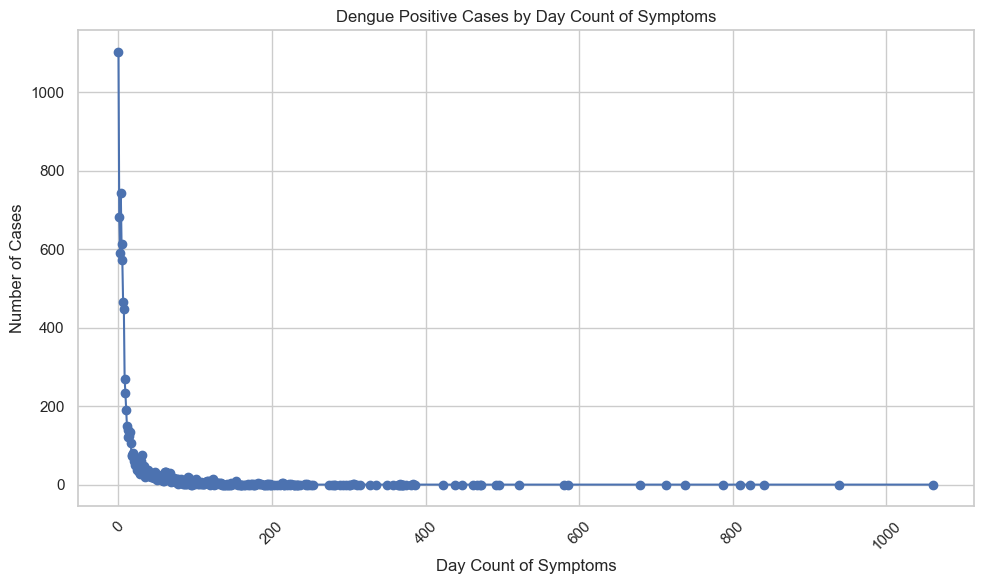

In [87]:
# Calculate the frequency of dengue positive cases for each day (Day_Count_of_Symptoms)
day_symptom_counts = dengue_positive_data['Day_Count_of_Symptoms'].value_counts().sort_index()

# Plotting the simple line graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(day_symptom_counts.index, day_symptom_counts.values, marker='o', color='b', linestyle='-', markersize=6)

plt.title('Dengue Positive Cases by Day Count of Symptoms')
plt.xlabel('Day Count of Symptoms')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [88]:
# Filter for only dengue positive cases
dengue_positive_data = data[data['Fever'] == 1]

# Step 1: Calculate percentage of population in each area
total_population = len(data)
area_population_counts = data['Residence_Area'].value_counts()
area_population_percentage = (area_population_counts / total_population) * 100

# Step 2: Calculate percentage of dengue positive cases in each race
race_positive_counts = dengue_positive_data['Race'].value_counts()
total_positive_cases = len(dengue_positive_data)
race_positive_percentage = (race_positive_counts / total_positive_cases) * 100

# Step 3: Create summary tables for both Area and Race dengue positive percentages
area_population_summary = pd.DataFrame({
    'Area': area_population_counts.index,
    'Population_Count': area_population_counts.values,
    'Population_Percentage': area_population_percentage.values
})

race_positive_summary = pd.DataFrame({
    'Race': race_positive_counts.index,
    'Dengue_Positive_Count': race_positive_counts.values,
    'Dengue_Positive_Percentage': race_positive_percentage.values
})

# Display the summary tables
print("Area Population Percentage:")
print(area_population_summary.to_string(index=False))
print("\nDengue Positive Cases by Race:")
print(race_positive_summary.to_string(index=False))


Area Population Percentage:
 Area  Population_Count  Population_Percentage
    1              9853              99.605742
    2                35               0.353821
    3                 4               0.040437

Dengue Positive Cases by Race:
 Race  Dengue_Positive_Count  Dengue_Positive_Percentage
    9                   6047                   67.144126
    4                   2340                   25.982678
    1                    359                    3.986231
    5                    119                    1.321341
    2                     90                    0.999334
    0                     34                    0.377526
    3                     17                    0.188763


In [114]:
import pandas as pd

# Step 1: Filter out any irrelevant or incorrect race values before proceeding with the analysis
filtered_data = data[data['Race'].isin([1, 2, 3, 4, 5, 9])]

# Step 2: Calculate the count of dengue-positive cases by race within this filtered dataset
race_positive_counts = filtered_data[filtered_data['Fever'] == 1]['Race'].value_counts().sort_index()
total_positive_cases = race_positive_counts.sum()  # Total number of positive cases

# Step 3: Calculate the percentage of positive cases for each race category
race_positive_percentage = (race_positive_counts / total_positive_cases) * 100

# Step 4: Create a summary DataFrame for race-based dengue-positive cases
race_positive_summary = pd.DataFrame({
    'Race': race_positive_counts.index,
    'Dengue_Positive_Count': race_positive_counts.values,
    'Dengue_Positive_Percentage': race_positive_percentage.values
})

# Display the race-positive summary
print("Race-wise Dengue Positive Summary:")
print(race_positive_summary.to_string(index=False))


Race-wise Dengue Positive Summary:
 Race  Dengue_Positive_Count  Dengue_Positive_Percentage
    1                    359                    4.001337
    2                     90                    1.003121
    3                     17                    0.189478
    4                   2340                   26.081141
    5                    119                    1.326349
    9                   6047                   67.398573


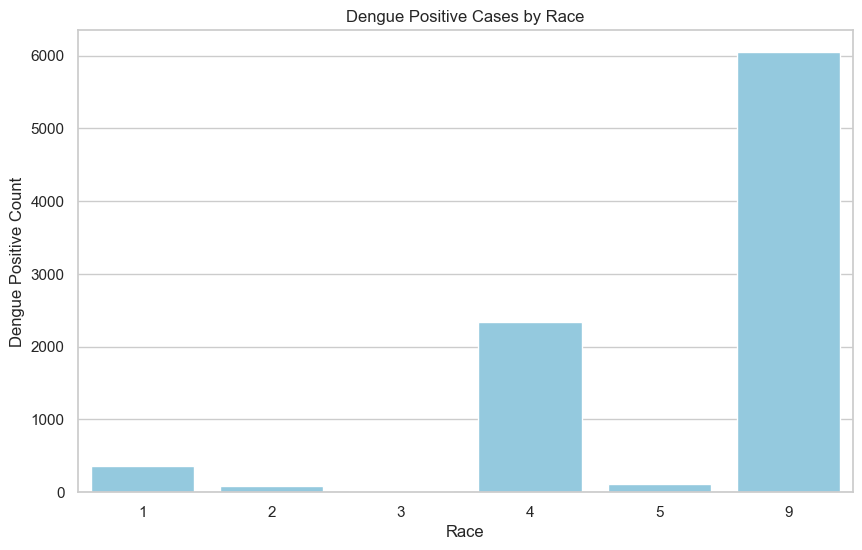

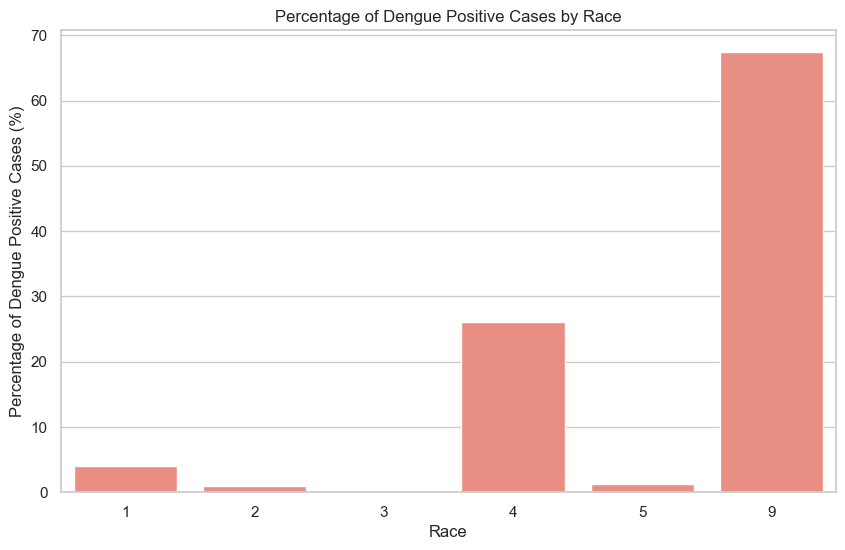

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'filtered_data' and 'race_positive_summary' have been defined as shown in the previous example

# Bar plot to visualize the count of dengue-positive cases by race
plt.figure(figsize=(10, 6))
sns.barplot(x='Race', y='Dengue_Positive_Count', data=race_positive_summary, color='skyblue')
plt.title('Dengue Positive Cases by Race')
plt.xlabel('Race')
plt.ylabel('Dengue Positive Count')
plt.show()

# Bar plot to visualize the percentage of dengue-positive cases by race
plt.figure(figsize=(10, 6))
sns.barplot(x='Race', y='Dengue_Positive_Percentage', data=race_positive_summary, color='salmon')
plt.title('Percentage of Dengue Positive Cases by Race')
plt.xlabel('Race')
plt.ylabel('Percentage of Dengue Positive Cases (%)')
plt.show()


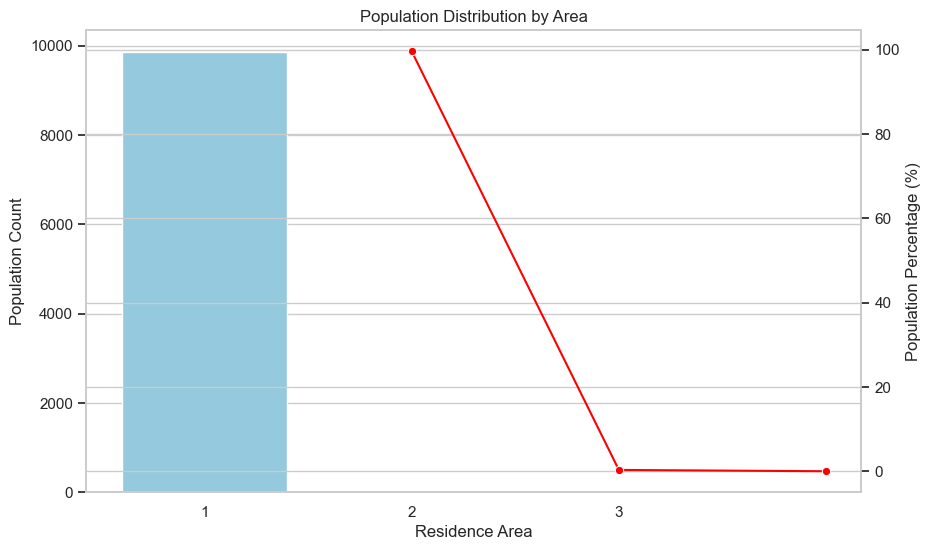

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the population count and percentage of each area as bar charts
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for the count of population by area
sns.barplot(x='Area', y='Population_Count', data=area_population_summary, color='skyblue', ax=ax1)
ax1.set_ylabel('Population Count')
ax1.set_title('Population Distribution by Area')
ax1.set_xlabel('Residence Area')

# Overlaying a line plot for population percentage on the same graph
ax2 = ax1.twinx()
sns.lineplot(x='Area', y='Population_Percentage', data=area_population_summary, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Population Percentage (%)')

# Display the plot
plt.show()


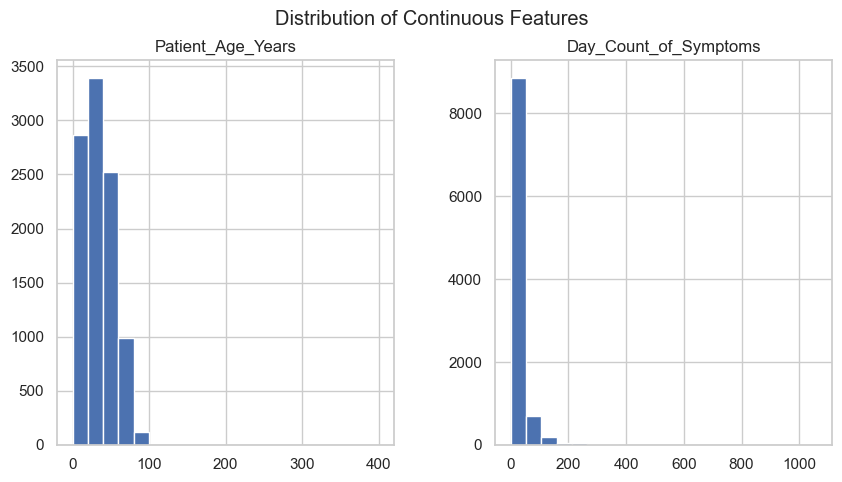

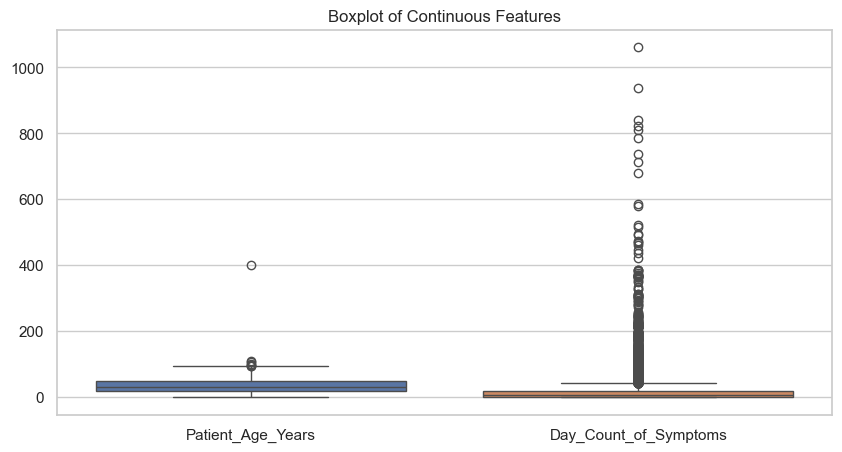

In [89]:
# Step 2: Exploratory Data Analysis (EDA)
# Distribution Analysis for Continuous Features
# Visualizations: Histograms and Box Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
data[['Patient_Age_Years', 'Day_Count_of_Symptoms']].hist(bins=20, figsize=(10, 5))
plt.suptitle("Distribution of Continuous Features")
plt.show()

# Box Plots to spot outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['Patient_Age_Years', 'Day_Count_of_Symptoms']])
plt.title("Boxplot of Continuous Features")
plt.show()


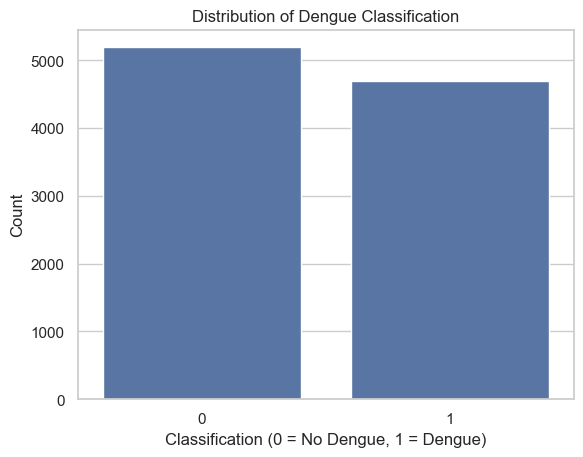

In [90]:
# Distribution of Target Variable (Classification)

# Distribution of Classification
sns.countplot(data=data, x='Classification')
plt.title("Distribution of Dengue Classification")
plt.xlabel("Classification (0 = No Dengue, 1 = Dengue)")
plt.ylabel("Count")
plt.show()



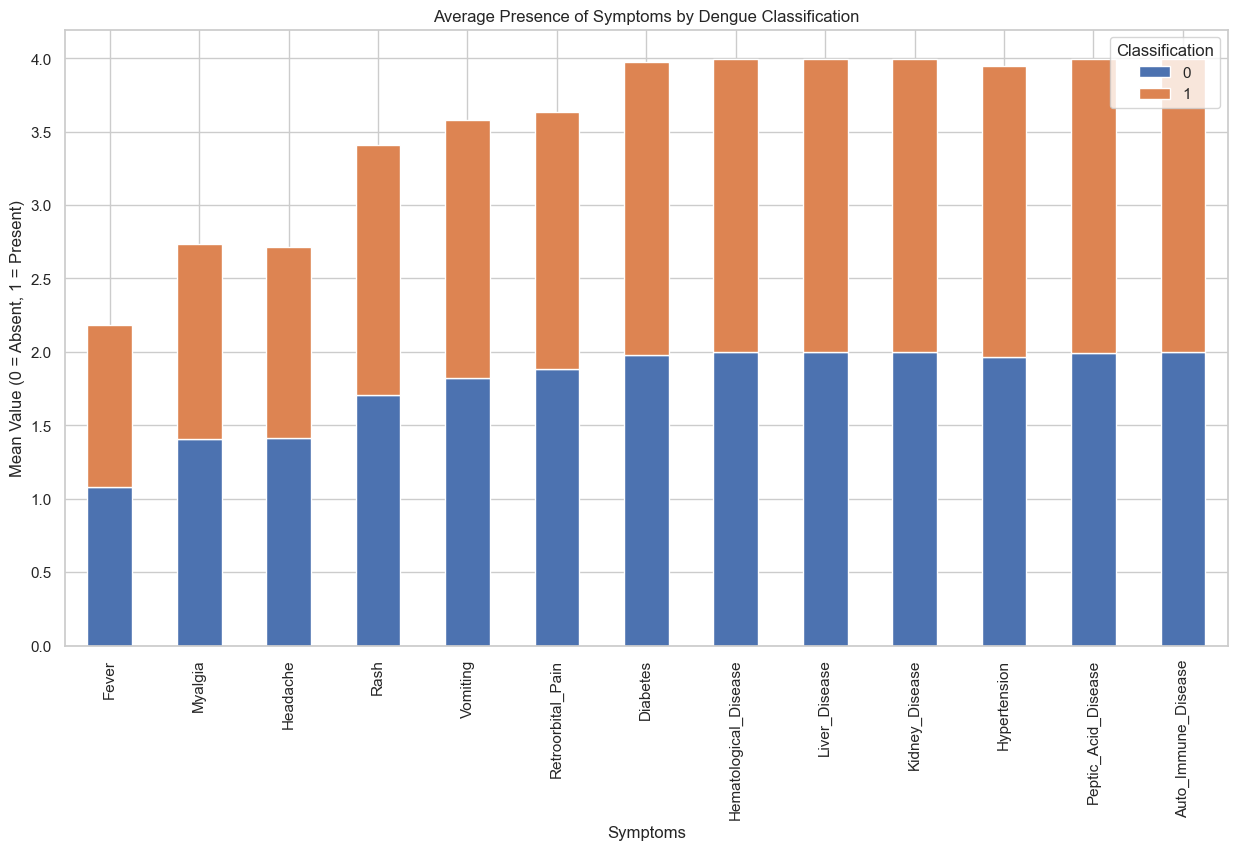

In [91]:
# Binary Feature Analysis by Target (Classification)
# Calculate the mean of each binary feature by Classification
binary_features = ['Fever', 'Myalgia', 'Headache', 'Rash', 'Vomiting', 
                   'Retroorbital_Pain', 'Diabetes', 'Hematological_Disease', 
                   'Liver_Disease', 'Kidney_Disease', 'Hypertension', 
                   'Peptic_Acid_Disease', 'Auto_Immune_Disease']

# Group by classification and calculate mean for each binary feature
binary_means = data.groupby('Classification')[binary_features].mean().T

# Plot the comparison
binary_means.plot(kind='bar', figsize=(15, 8), stacked=True)
plt.title("Average Presence of Symptoms by Dengue Classification")
plt.ylabel("Mean Value (0 = Absent, 1 = Present)")
plt.xlabel("Symptoms")
plt.legend(title="Classification", loc='upper right')
plt.show()


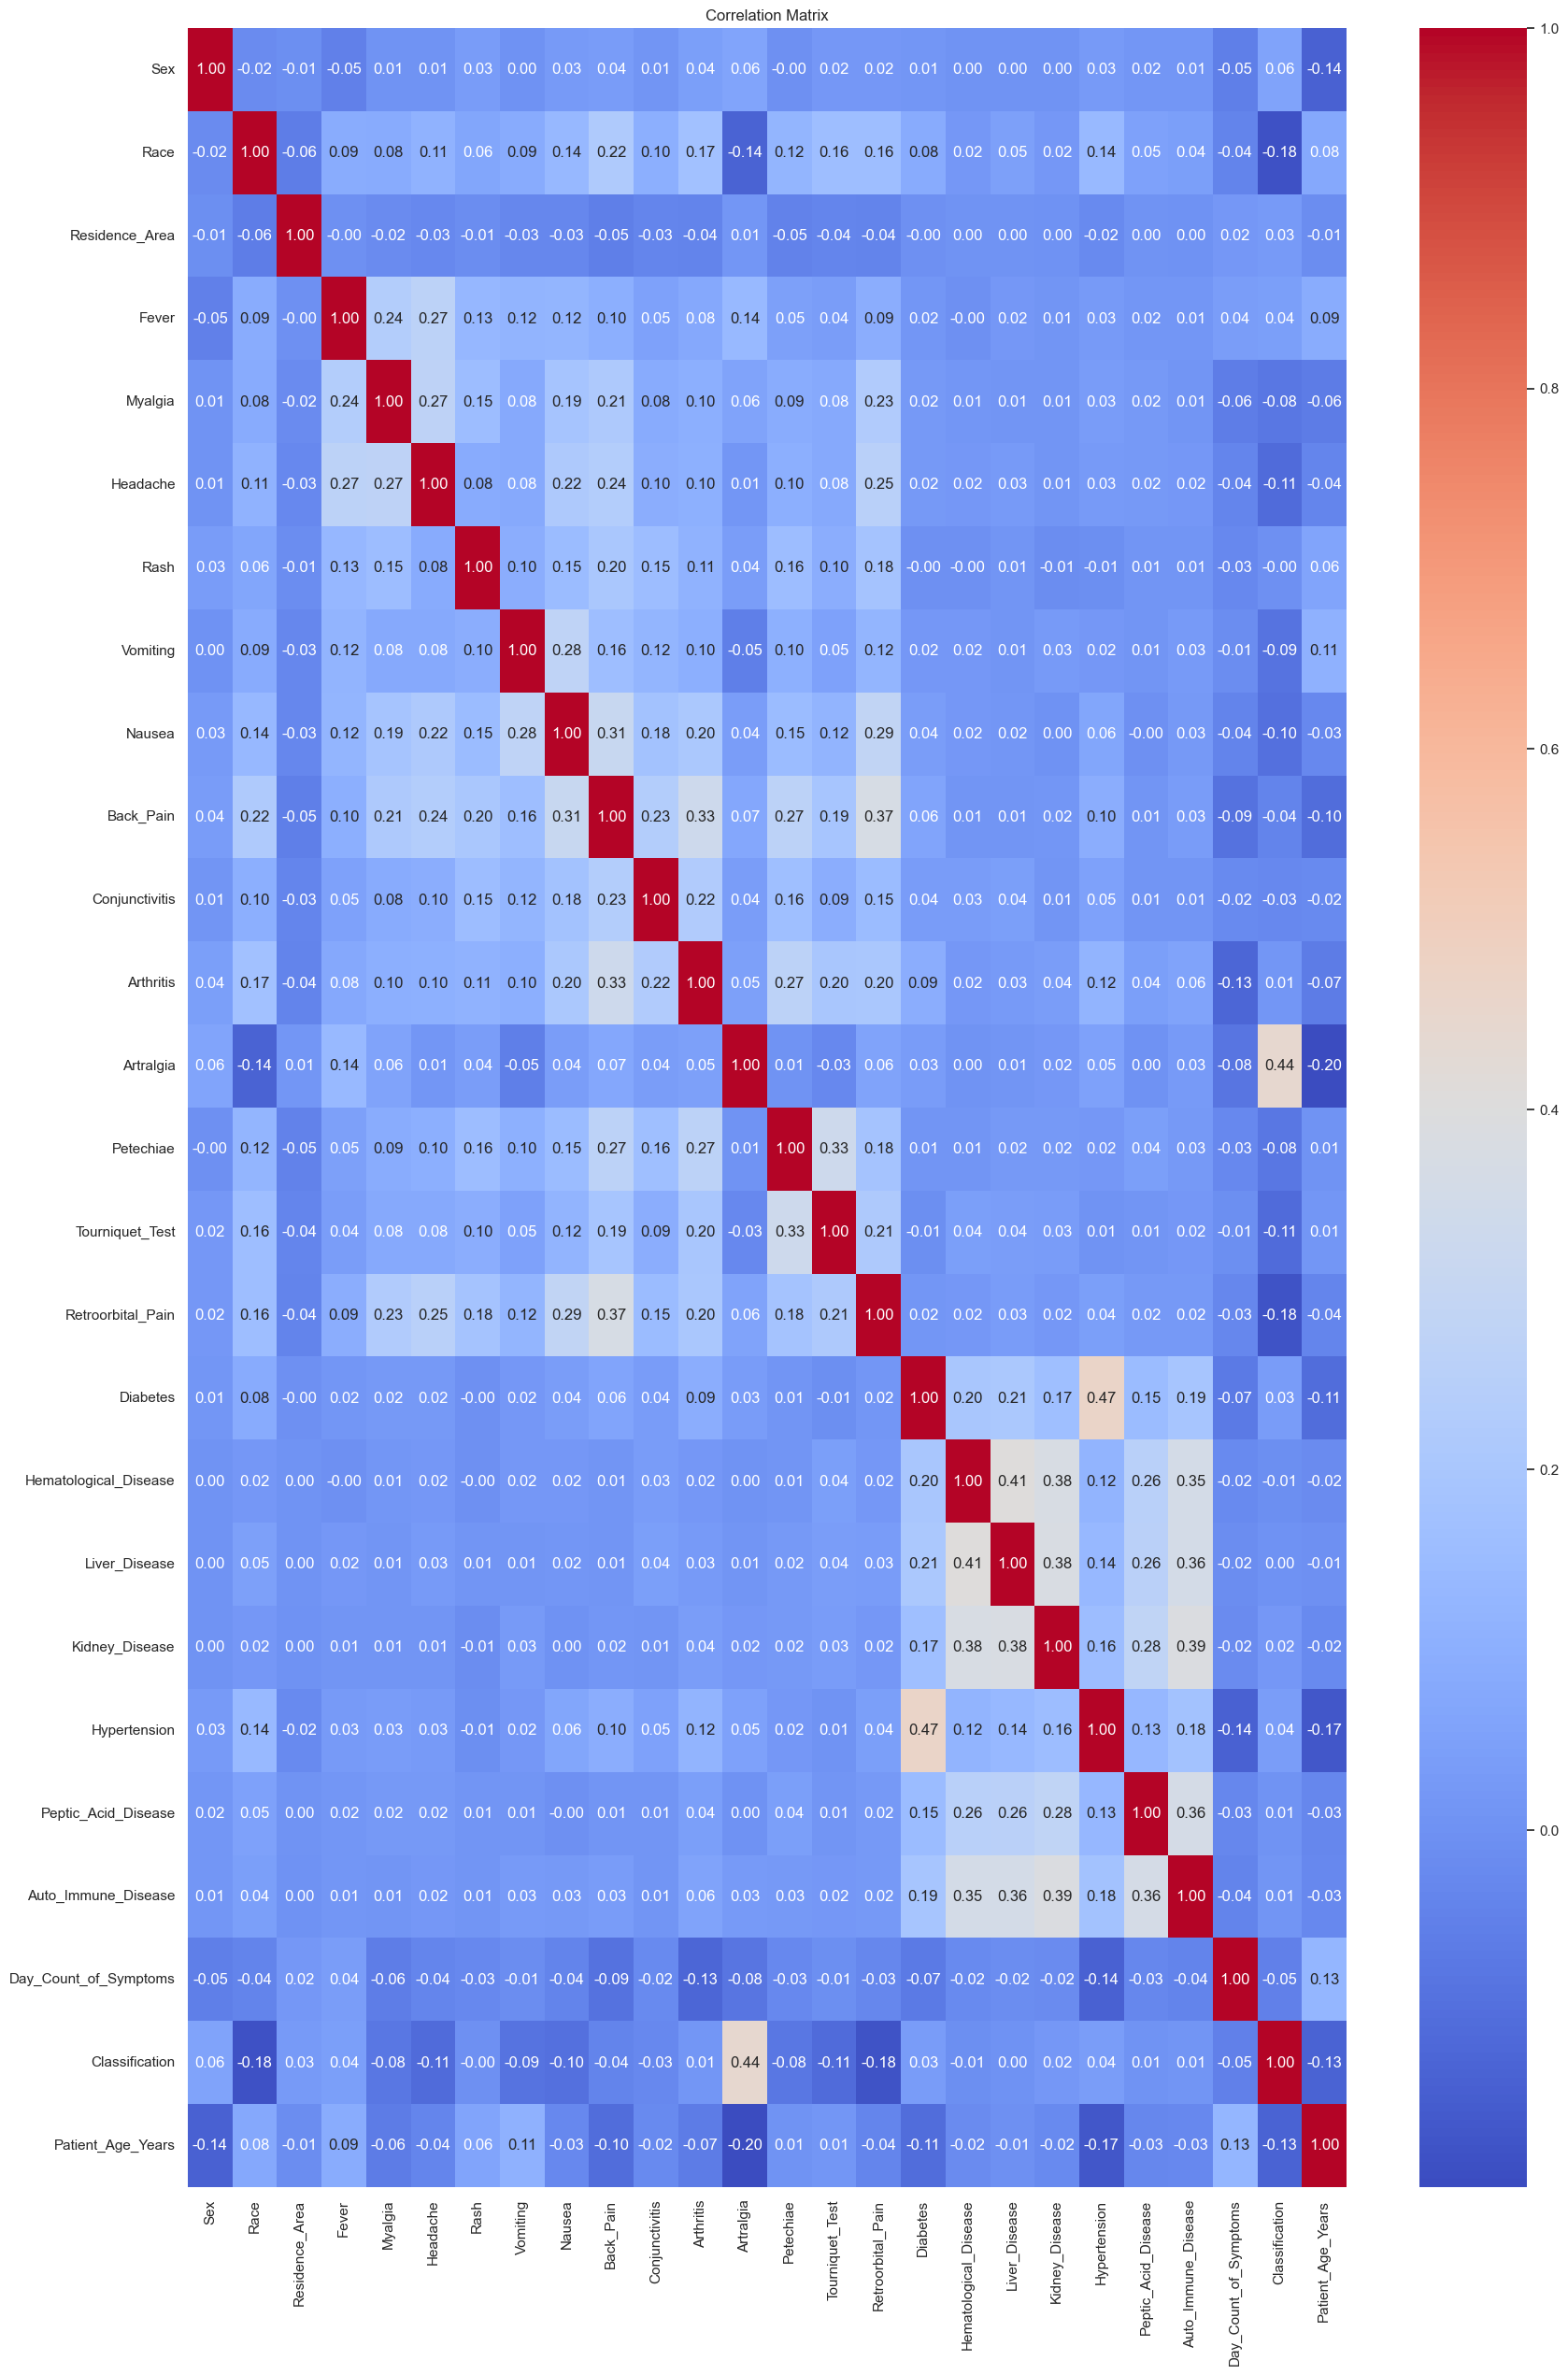

In [92]:
# Correlation Analysis
# Correlation matrix
plt.figure(figsize=(20, 30))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


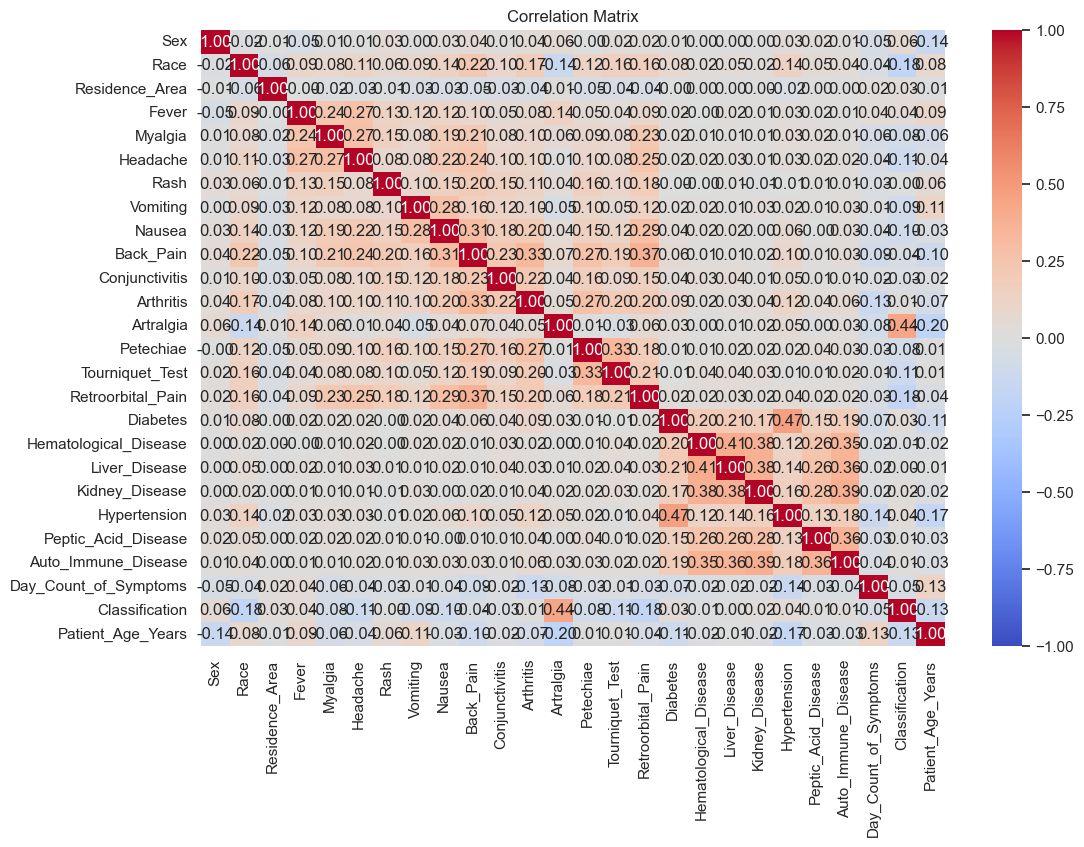

Highly correlated features: set()


In [93]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix to identify highly correlated features
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Identify highly correlated features
correlated_features = set()
threshold = 0.9

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print("Highly correlated features:", correlated_features)


In [94]:
data.head(5)

,Sex,Race,Residence_Area,Fever,Myalgia,Headache,Rash,Vomiting,Nausea,Back_Pain,...,Diabetes,Hematological_Disease,Liver_Disease,Kidney_Disease,Hypertension,Peptic_Acid_Disease,Auto_Immune_Disease,Day_Count_of_Symptoms,Classification,Patient_Age_Years
0,0,1,3,1,1,1,2,2,2,1,...,2,2,2,2,2,2,2,1,0,22.0
1,1,4,1,1,1,1,2,2,2,1,...,2,2,2,2,2,2,2,6,0,20.0
2,0,4,1,1,1,1,2,2,2,2,...,2,2,2,2,2,2,2,32,0,61.0
3,1,4,1,1,1,1,2,2,2,2,...,2,2,2,2,2,2,2,2,0,46.0
4,1,4,1,1,1,1,2,1,2,1,...,2,2,2,2,2,2,2,2,0,14.0


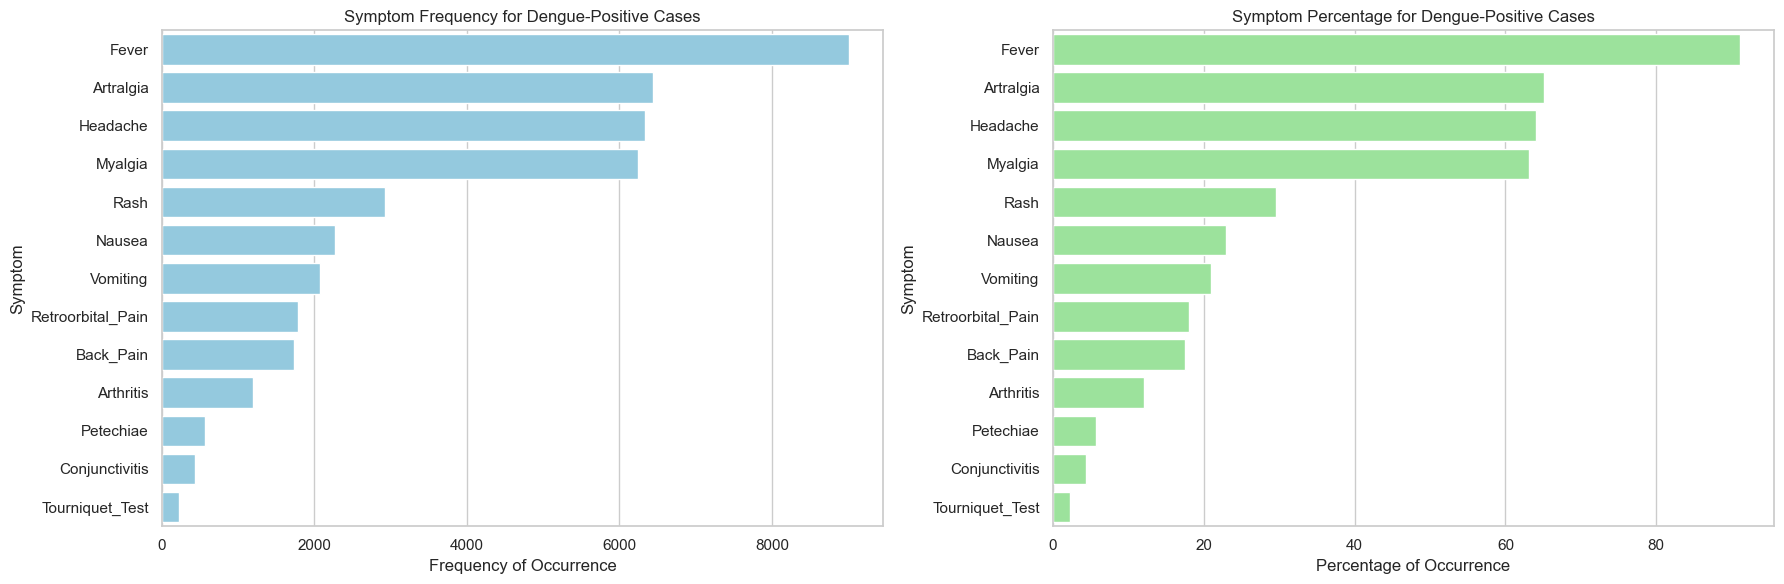

In [95]:
# EDA 
# symptom frequency and percentage for dengue-positive cases

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the graph
sns.set(style="whitegrid")

# Create the figure with two subplots (one for frequency and one for percentage)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot frequency of symptoms
sns.barplot(x='Presents', y='Symptom', data=symptom_summary_positive, ax=axes[0], color='skyblue')
axes[0].set_title('Symptom Frequency for Dengue-Positive Cases')
axes[0].set_xlabel('Frequency of Occurrence')
axes[0].set_ylabel('Symptom')

# Plot percentage of symptoms
sns.barplot(x='Percentage', y='Symptom', data=symptom_summary_positive, ax=axes[1], color='lightgreen')
axes[1].set_title('Symptom Percentage for Dengue-Positive Cases')
axes[1].set_xlabel('Percentage of Occurrence')
axes[1].set_ylabel('Symptom')

# Display the plot
plt.tight_layout()
plt.show()



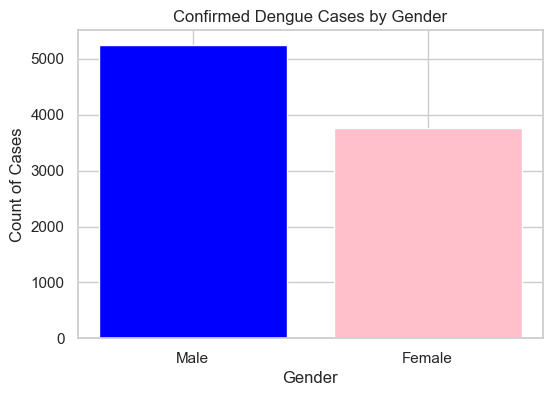

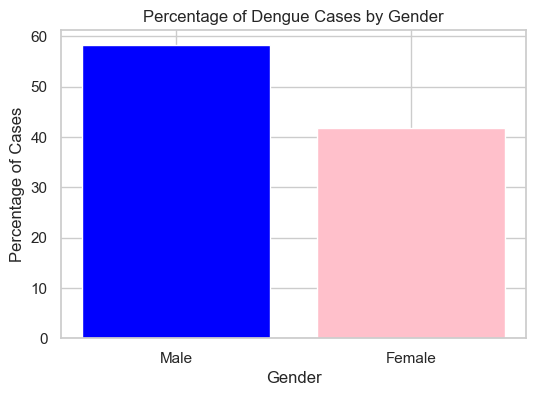

In [96]:
# confirmed dengue cases by gender
# Plotting the bar chart for count
plt.figure(figsize=(6, 4))
plt.bar(sex_summary['Gender'], sex_summary['Count'], color=['blue', 'pink'])
plt.title("Confirmed Dengue Cases by Gender")
plt.xlabel("Gender")
plt.ylabel("Count of Cases")
plt.show()

# Plotting the bar chart for percentage
plt.figure(figsize=(6, 4))
plt.bar(sex_summary['Gender'], sex_summary['Percentage'], color=['blue', 'pink'])
plt.title("Percentage of Dengue Cases by Gender")
plt.xlabel("Gender")
plt.ylabel("Percentage of Cases")
plt.show()

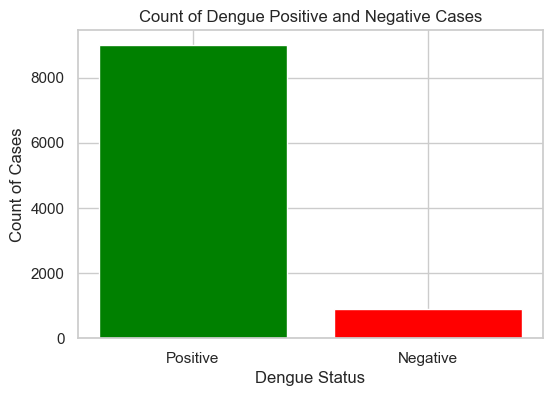

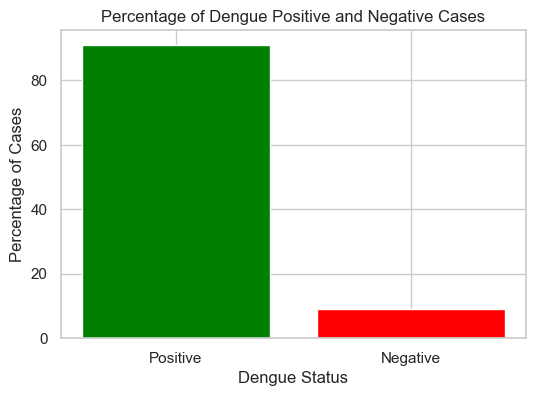

In [97]:
# count and percentage of dengue positive and negative cases

# Plotting the bar chart for Count of Dengue Cases
plt.figure(figsize=(6, 4))
plt.bar(dengue_summary['Dengue_Status'], dengue_summary['Count'], color=['green', 'red'])
plt.title("Count of Dengue Positive and Negative Cases")
plt.xlabel("Dengue Status")
plt.ylabel("Count of Cases")
plt.show()

# Plotting the bar chart for Percentage of Dengue Cases
plt.figure(figsize=(6, 4))
plt.bar(dengue_summary['Dengue_Status'], dengue_summary['Percentage'], color=['green', 'red'])
plt.title("Percentage of Dengue Positive and Negative Cases")
plt.xlabel("Dengue Status")
plt.ylabel("Percentage of Cases")
plt.show()

XGBoost Accuracy: 0.7539


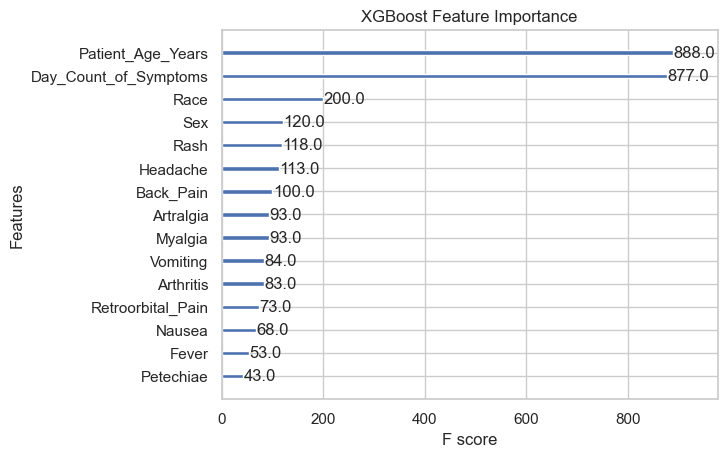

In [98]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming your dataset is loaded in the 'data' DataFrame
# The target label is "Classification" and all other columns are features

# Preprocessing: Remove non-numeric columns and handle categorical features
# (Update this according to your actual dataset columns)
# X = data.drop(columns=['Classification'])  # All features except target 'Classification'
# y = data['Classification']  # Target variable

X = data.loc[:, data.columns != 'Classification']  # This selects all columns except 'Classification'
y = data['Classification']  # Target variable

# Split the data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------- XGBoost -------------------------
# Train an XGBoost model
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Plot XGBoost feature importance
xgb.plot_importance(model_xgb, importance_type='weight', max_num_features=15, title="XGBoost Feature Importance")
plt.show()

Random Forest Accuracy: 0.7322


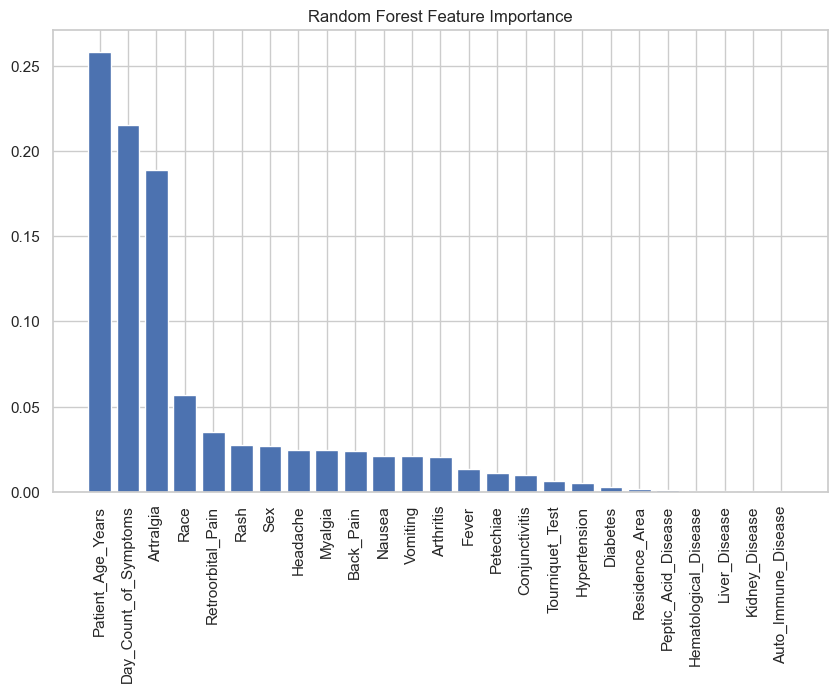

In [99]:
# Train a Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Plot Random Forest feature importance
importances_rf = model_rf.feature_importances_
indices_rf = importances_rf.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance")
plt.bar(range(X.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices_rf], rotation=90)
plt.show()

In [100]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")


Accuracy: 75.39%


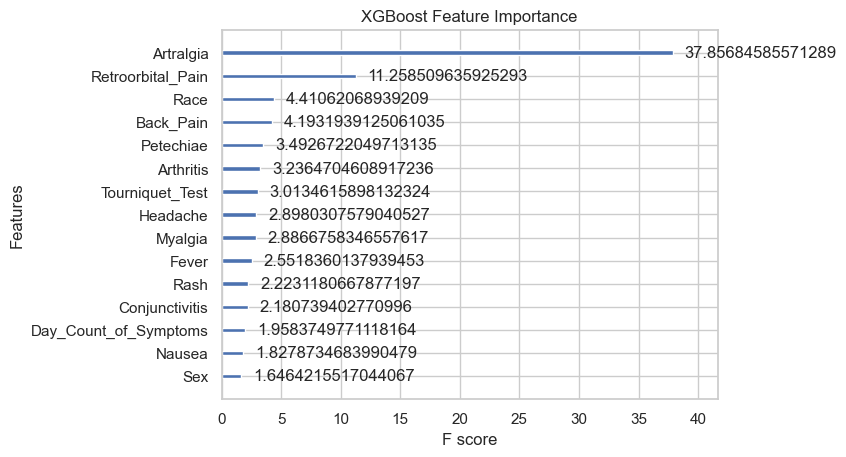

In [102]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance using 'gain'
xgb.plot_importance(model, importance_type='gain', max_num_features=15)
plt.title("XGBoost Feature Importance")
plt.show()


Precision: 0.75
Recall: 0.70
F1-Score: 0.73
Accuracy: 0.75
ROC-AUC: 0.82


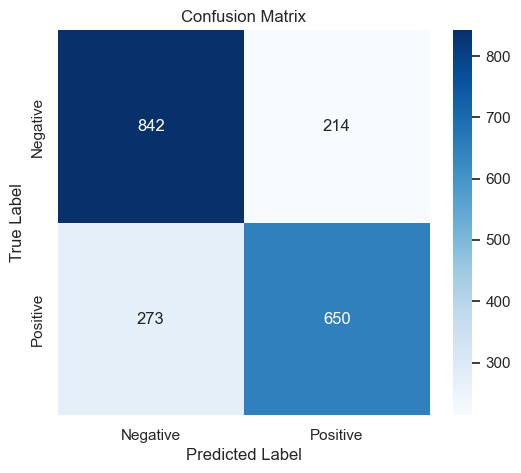

In [103]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your model is already trained and you have predictions
y_pred = model.predict(X_test)

# Calculate Precision, Recall, F1-Score, and Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # Assumes your model has predict_proba

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


C:\Users\Mahbub Hussain\AppData\Local\Temp\ipykernel_1812\1101211570.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_positive_cases['Age_Group'] = pd.cut(dengue_positive_cases['Patient_Age_Years'], bins=bins, labels=labels, right=False)
C:\Users\Mahbub Hussain\AppData\Local\Temp\ipykernel_1812\1101211570.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_counts = dengue_positive_cases.groupby(['Age_Group', 'Sex']).size().unstack(fill_value=0)
C:\Users\Mahbub Hussain\AppData\Local\Temp\ipykernel_1812\1101211570.py:18: FutureWarning: T

Dengue Cases by Age Group and Gender:
           Male Count  Female Count  Male Percentage  Female Percentage  \
Age_Group                                                                 
0-5               242           293        45.233645          54.766355   
6-15              626           743        45.726808          54.273192   
16-25             860           622        58.029690          41.970310   
26-40            1318           959        57.883180          42.116820   
41-60            1494           807        64.928292          35.071708   
60+               707           332        68.046198          31.953802   

           Total Count  
Age_Group               
0-5                535  
6-15              1369  
16-25             1482  
26-40             2277  
41-60             2301  
60+               1039  


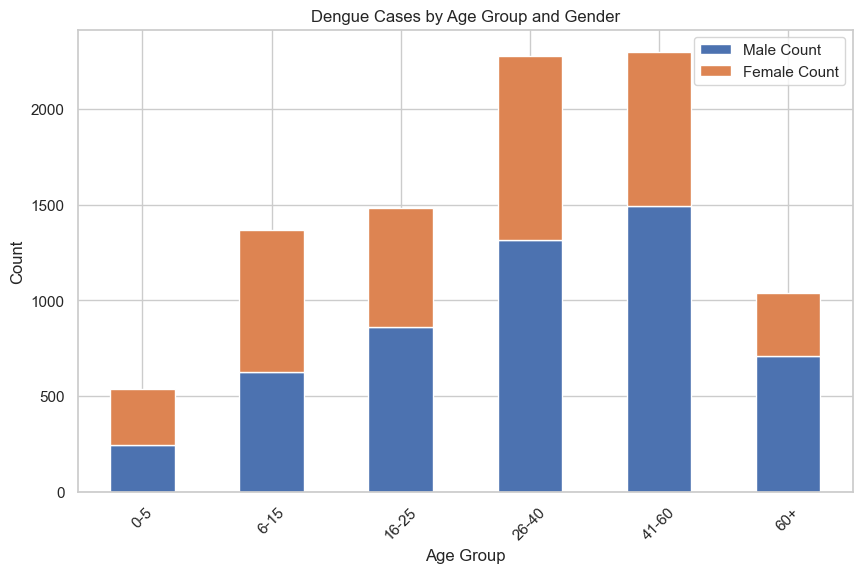

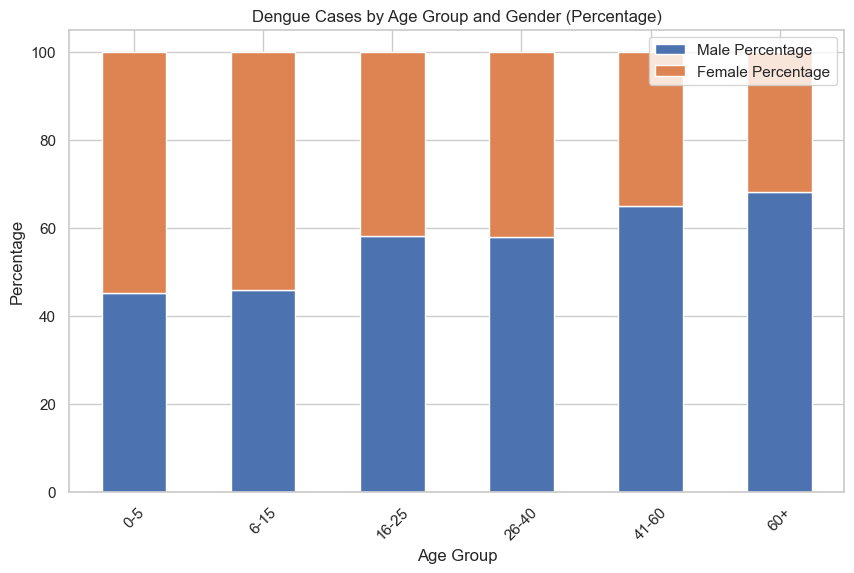

In [105]:
import pandas as pd

# Sample dataset (replace this with your actual dataset)
# data = pd.read_csv('your_dataset.csv') 

# Filter only dengue-positive cases (Fever == 1)
dengue_positive_cases = data[data['Fever'] == 1]

# Create age groups
bins = [0, 5, 15, 25, 40, 60, 100]
labels = ['0-5', '6-15', '16-25', '26-40', '41-60', '60+']
dengue_positive_cases['Age_Group'] = pd.cut(dengue_positive_cases['Patient_Age_Years'], bins=bins, labels=labels, right=False)

# Count of male and female cases in each age group
age_gender_counts = dengue_positive_cases.groupby(['Age_Group', 'Sex']).size().unstack(fill_value=0)

# Total dengue-positive cases in each age group
age_group_counts = dengue_positive_cases.groupby('Age_Group').size()

# Calculate percentages of male and female cases in each age group
age_gender_percentage = age_gender_counts.divide(age_group_counts, axis=0) * 100

# Create a summary table to show the results
age_summary = pd.DataFrame({
    'Male Count': age_gender_counts[0],
    'Female Count': age_gender_counts[1],
    'Male Percentage': age_gender_percentage[0],
    'Female Percentage': age_gender_percentage[1],
    'Total Count': age_group_counts
})

# Display the summary
print("Dengue Cases by Age Group and Gender:")
print(age_summary)

# Optional: Plotting the results for better visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar graph for better visualization of gender distribution across age groups
age_summary[['Male Count', 'Female Count']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Dengue Cases by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plotting percentage distribution for male and female
age_summary[['Male Percentage', 'Female Percentage']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Dengue Cases by Age Group and Gender (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


C:\Users\Mahbub Hussain\AppData\Local\Temp\ipykernel_1812\61106400.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_positive_cases['Age_Group'] = pd.cut(dengue_positive_cases['Patient_Age_Years'], bins=age_bins, labels=age_labels, right=False)
C:\Users\Mahbub Hussain\AppData\Local\Temp\ipykernel_1812\61106400.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_negative_cases['Age_Group'] = pd.cut(dengue_negative_cases['Patient_Age_Years'], bins=age_bins, labels=age_labels, right=False)


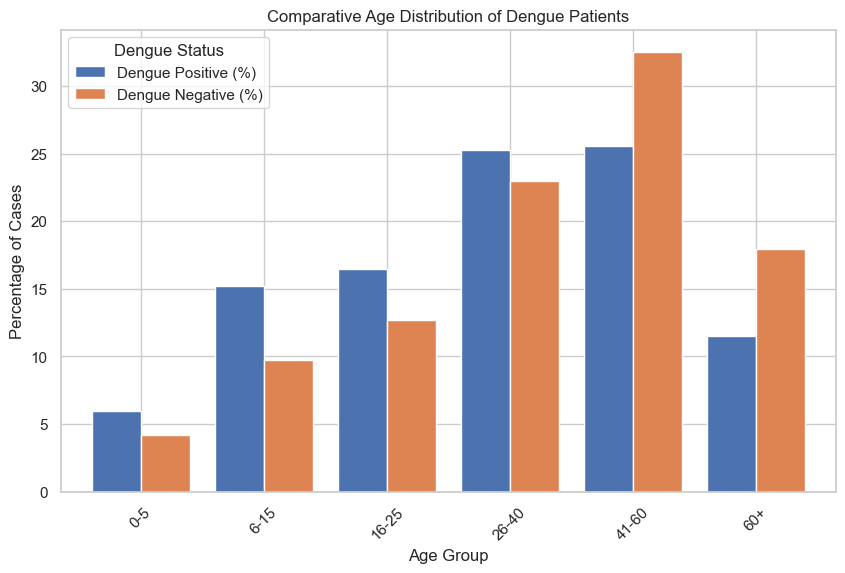

C:\Users\Mahbub Hussain\AppData\Local\Temp\ipykernel_1812\61106400.py:41: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dengue_positive_cases['Patient_Age_Years'], shade=True, label='Dengue Positive', color='blue')
C:\Users\Mahbub Hussain\AppData\Local\Temp\ipykernel_1812\61106400.py:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dengue_negative_cases['Patient_Age_Years'], shade=True, label='Dengue Negative', color='orange')


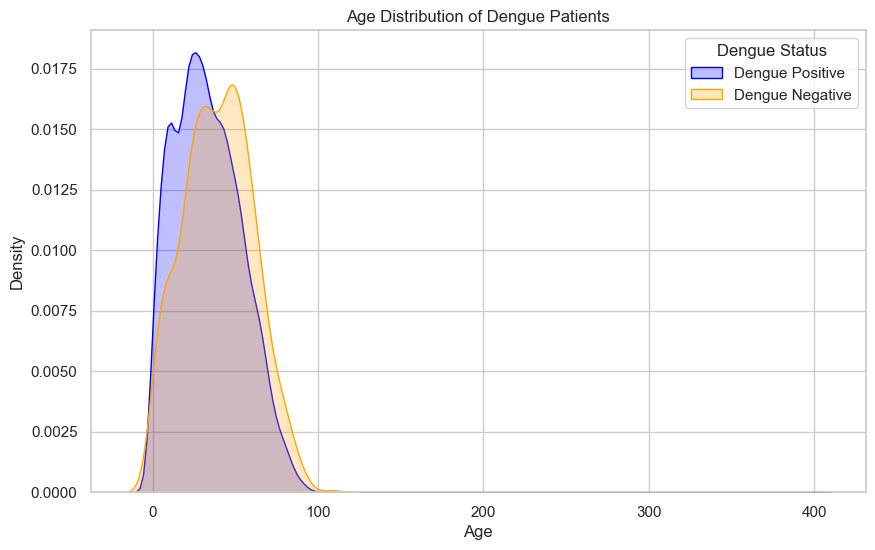

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset loading (replace this with your actual dataset)
# data = pd.read_csv('your_dataset.csv') 

# Separate dengue-positive and dengue-negative cases
dengue_positive_cases = data[data['Fever'] == 1]
dengue_negative_cases = data[data['Fever'] == 2]

# Define age bins and labels
age_bins = [0, 5, 15, 25, 40, 60, 100]
age_labels = ['0-5', '6-15', '16-25', '26-40', '41-60', '60+']

# Create age groups for both dengue-positive and dengue-negative cases
dengue_positive_cases['Age_Group'] = pd.cut(dengue_positive_cases['Patient_Age_Years'], bins=age_bins, labels=age_labels, right=False)
dengue_negative_cases['Age_Group'] = pd.cut(dengue_negative_cases['Patient_Age_Years'], bins=age_bins, labels=age_labels, right=False)

# Count age group distribution in both groups
positive_age_distribution = dengue_positive_cases['Age_Group'].value_counts(normalize=True).sort_index() * 100
negative_age_distribution = dengue_negative_cases['Age_Group'].value_counts(normalize=True).sort_index() * 100

# Combine into a DataFrame for easier plotting
age_distribution_df = pd.DataFrame({
    'Dengue Positive (%)': positive_age_distribution,
    'Dengue Negative (%)': negative_age_distribution
})

# Plotting a side-by-side bar plot for age group distribution
age_distribution_df.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Comparative Age Distribution of Dengue Patients')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=45)
plt.legend(title='Dengue Status')
plt.show()

# Alternatively, KDE plots for continuous age comparison
plt.figure(figsize=(10, 6))
sns.kdeplot(dengue_positive_cases['Patient_Age_Years'], shade=True, label='Dengue Positive', color='blue')
sns.kdeplot(dengue_negative_cases['Patient_Age_Years'], shade=True, label='Dengue Negative', color='orange')
plt.title('Age Distribution of Dengue Patients')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Dengue Status')
plt.show()


Mean Age of Dengue-Positive Patients: 33.27 years
Mean Age of Dengue-Negative Patients: 39.66 years


C:\Users\Mahbub Hussain\AppData\Local\Temp\ipykernel_1812\2385574135.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dengue_positive_cases['Patient_Age_Years'], shade=True, label=f'Dengue Positive (Mean Age: {mean_age_positive:.2f})', color='blue')
C:\Users\Mahbub Hussain\AppData\Local\Temp\ipykernel_1812\2385574135.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dengue_negative_cases['Patient_Age_Years'], shade=True, label=f'Dengue Negative (Mean Age: {mean_age_negative:.2f})', color='orange')


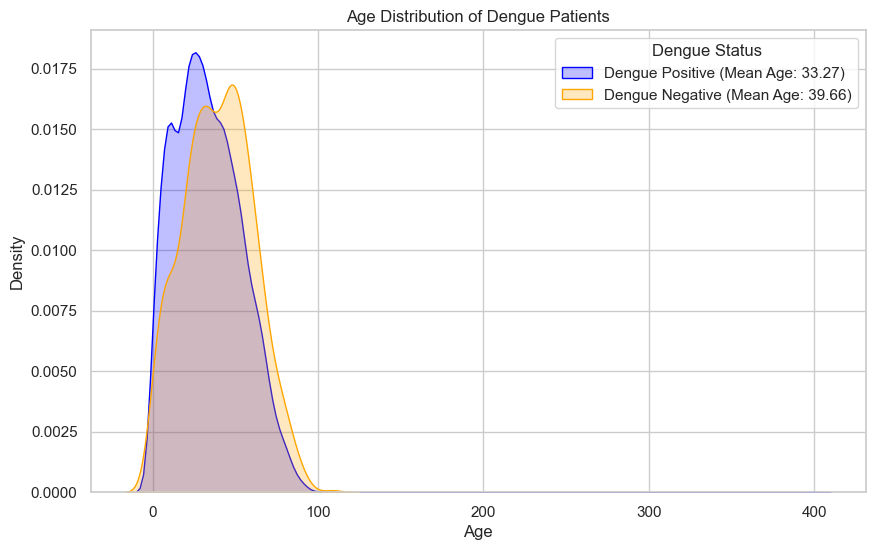

In [112]:
# Calculate the mean age for dengue-positive and dengue-negative cases
mean_age_positive = dengue_positive_cases['Patient_Age_Years'].mean()
mean_age_negative = dengue_negative_cases['Patient_Age_Years'].mean()

# Display the mean age
print(f"Mean Age of Dengue-Positive Patients: {mean_age_positive:.2f} years")
print(f"Mean Age of Dengue-Negative Patients: {mean_age_negative:.2f} years")

# Optional: Adding mean age to the plots
plt.figure(figsize=(10, 6))
sns.kdeplot(dengue_positive_cases['Patient_Age_Years'], shade=True, label=f'Dengue Positive (Mean Age: {mean_age_positive:.2f})', color='blue')
sns.kdeplot(dengue_negative_cases['Patient_Age_Years'], shade=True, label=f'Dengue Negative (Mean Age: {mean_age_negative:.2f})', color='orange')
plt.title('Age Distribution of Dengue Patients')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Dengue Status')
plt.show()


C:\Users\Mahbub Hussain\AppData\Local\Temp\ipykernel_1812\1568855486.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_positive_cases['Age_Group'] = pd.cut(dengue_positive_cases['Patient_Age_Years'], bins=age_bins, labels=age_labels, right=False)
C:\Users\Mahbub Hussain\AppData\Local\Temp\ipykernel_1812\1568855486.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_negative_cases['Age_Group'] = pd.cut(dengue_negative_cases['Patient_Age_Years'], bins=age_bins, labels=age_labels, right=False

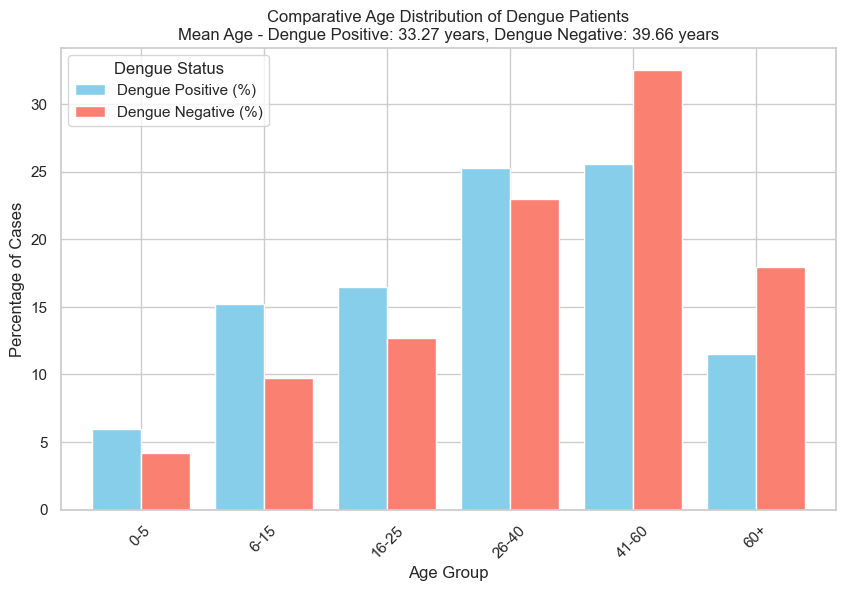

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset loading (replace this with your actual dataset)
# data = pd.read_csv('your_dataset.csv') 

# Separate dengue-positive and dengue-negative cases
dengue_positive_cases = data[data['Fever'] == 1]
dengue_negative_cases = data[data['Fever'] == 2]

# Calculate the mean age for each group
mean_age_positive = dengue_positive_cases['Patient_Age_Years'].mean()
mean_age_negative = dengue_negative_cases['Patient_Age_Years'].mean()

# Define age bins and labels
age_bins = [0, 5, 15, 25, 40, 60, 100]
age_labels = ['0-5', '6-15', '16-25', '26-40', '41-60', '60+']

# Create age groups for both dengue-positive and dengue-negative cases
dengue_positive_cases['Age_Group'] = pd.cut(dengue_positive_cases['Patient_Age_Years'], bins=age_bins, labels=age_labels, right=False)
dengue_negative_cases['Age_Group'] = pd.cut(dengue_negative_cases['Patient_Age_Years'], bins=age_bins, labels=age_labels, right=False)

# Count age group distribution in both groups
positive_age_distribution = dengue_positive_cases['Age_Group'].value_counts(normalize=True).sort_index() * 100
negative_age_distribution = dengue_negative_cases['Age_Group'].value_counts(normalize=True).sort_index() * 100

# Combine into a DataFrame for easier plotting
age_distribution_df = pd.DataFrame({
    'Dengue Positive (%)': positive_age_distribution,
    'Dengue Negative (%)': negative_age_distribution
})

# Plotting a side-by-side bar plot for age group distribution
ax = age_distribution_df.plot(kind='bar', figsize=(10, 6), width=0.8, color=['skyblue', 'salmon'])
plt.title(f'Comparative Age Distribution of Dengue Patients\nMean Age - Dengue Positive: {mean_age_positive:.2f} years, Dengue Negative: {mean_age_negative:.2f} years')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=45)
plt.legend(title='Dengue Status')
plt.show()


C:\Users\Mahbub Hussain\AppData\Local\Temp\ipykernel_1812\245112153.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_positive_cases['Age_Group'] = pd.cut(dengue_positive_cases['Patient_Age_Years'], bins=age_bins, labels=age_labels, right=False)


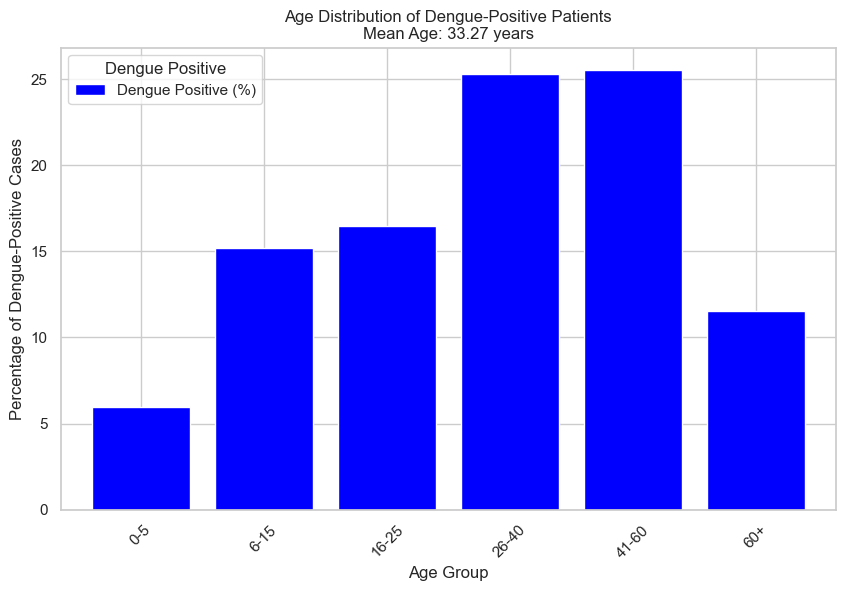

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean age for dengue-positive cases
mean_age_positive = dengue_positive_cases['Patient_Age_Years'].mean()

# Define age bins and labels
age_bins = [0, 5, 15, 25, 40, 60, 100]
age_labels = ['0-5', '6-15', '16-25', '26-40', '41-60', '60+']

# Create age groups for dengue-positive cases
dengue_positive_cases['Age_Group'] = pd.cut(dengue_positive_cases['Patient_Age_Years'], bins=age_bins, labels=age_labels, right=False)

# Count age group distribution for dengue-positive cases
positive_age_distribution = dengue_positive_cases['Age_Group'].value_counts(normalize=True).sort_index() * 100

# Create a DataFrame for easier plotting
positive_age_distribution_df = pd.DataFrame({
    'Dengue Positive (%)': positive_age_distribution
})

# Plotting a bar plot for age group distribution in dengue-positive cases
ax = positive_age_distribution_df.plot(kind='bar', figsize=(10, 6), color='blue', width=0.8)
plt.title(f'Age Distribution of Dengue-Positive Patients\nMean Age: {mean_age_positive:.2f} years')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Dengue-Positive Cases')
plt.xticks(rotation=45)
plt.legend(title='Dengue Positive')
plt.show()
